In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/train.csv')
df.head(50)

,password,strength
0,nmrw1FTk3OQoPOLN,2
1,rfhvglwsp29,1
2,camvcamv12,1
3,EO39eXDgxNAw6qkF,2
4,jackchen12,1
5,qlgchmyi2,1
6,ezaxa614,1
7,a920rza8,1
8,hossam1234500,1
9,NomoresorroW123,2


In [4]:
## Multi-Class Classification Problem
## imbalance correction
df['strength'].value_counts()

,count
strength,
1,312881
0,56466
2,52525


In [5]:
## y is NO LONGER a vector in the model
## y = [1,0,0]  - obs 1
## y = [0,0,1]  - obs 2
## One-Hot encoded

In [ ]:
## Strategies
## One vs Rest (e.g., weak vs moderate and strong)
## One vs One  (e.g., weak vs strong)
## the models are combined using a softmax function

In [7]:
## create y vector
y = df['strength']

In [9]:
## vectorize X
from sklearn.feature_extraction.text import TfidfVectorizer

## instance (select analyzer = "char")
vectorizer = TfidfVectorizer(analyzer = "char", ngram_range=(1,3), max_features=200)

## .fit_transform
X = vectorizer.fit_transform(df['password'])
X = X.todense()

In [10]:
## shape
X.shape

(421872, 200)

In [11]:
X = pd.DataFrame(X, columns = vectorizer.get_feature_names_out())
X.head()

,0,00,01,02,03,04,05,06,07,08,...,ve,vi,w,wa,we,x,y,ya,z,za
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.217778,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.335694,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.235798,0.0,0.0,0.51744,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0


In [12]:
## split the data into 70%/30%
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=630)

In [16]:
y_train

,strength
183218,0
147735,1
323459,1
161664,1
183782,1
...,...
46960,2
28591,1
17213,2
35444,2


In [17]:
## the best approach for multi-class in Tensorflow/Pytorch (deep learning)
## is to one-hot encode the response for training

## y_train = pd.get_dummies(y_train)
from sklearn.preprocessing import OneHotEncoder

## instance
encoder = OneHotEncoder()

## fit and transform
y_train = encoder.fit_transform(y_train.values.reshape(-1,1))
y_train

<295310x3 sparse matrix of type '<class 'numpy.float64'>'
	with 295310 stored elements in Compressed Sparse Row format>

In [18]:
## from sparse to dense
y_train = y_train.todense()

In [20]:
## Implement Input - Hidden 1 (64 - Relu) - Hidden 2 (32 - Relu) - Output (3 neurons)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

## start model
model = Sequential(
    [
        Input(shape = (X_train.shape[1], ) ),  ## input layer
        Dense(64, activation = "relu"),        ## hidden 1
        Dense(32, activation = "relu"),        ## hidden 2
        Dense(3, activation = "softmax")       ## output layer (3, softmax)
    ]
)

In [21]:
## how many params
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │          12,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,043 (58.76 KB)

 Trainable params: 15,043 (58.76 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
## compile (what is the solver (optimizer), learning rate, cost function, metrics)
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"] )

In [26]:
## fit - batch_size, epochs, validation_data
model.fit(X_train, y_train, batch_size = 200, epochs = 10, validation_split = 0.2 )  ## validation_data = (X_test, y_test) need to transform y_test

Epoch 1/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9244 - loss: 0.1839 - val_accuracy: 0.9243 - val_loss: 0.1858
Epoch 2/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9267 - loss: 0.1823 - val_accuracy: 0.9254 - val_loss: 0.1819
Epoch 3/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9272 - loss: 0.1788 - val_accuracy: 0.9240 - val_loss: 0.1854
Epoch 4/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9292 - loss: 0.1761 - val_accuracy: 0.9227 - val_loss: 0.1873
Epoch 5/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9294 - loss: 0.1744 - val_accuracy: 0.9249 - val_loss: 0.1824
Epoch 6/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9299 - loss: 0.1715 - val_accuracy: 0.9243 - val_loss: 0.1849
Epoch 7/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9309 - loss: 0.1719 - val_accuracy: 0.9238 - val_loss: 0.1849
Epoch 8/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9322 - loss: 0.1688 - 

In [28]:
## predict
yhat = np.argmax(model.predict(X_test), axis=1) ## select the class with the highest prob

3956/3956 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step


In [29]:
yhat

array([0, 1, 0, ..., 1, 1, 1])

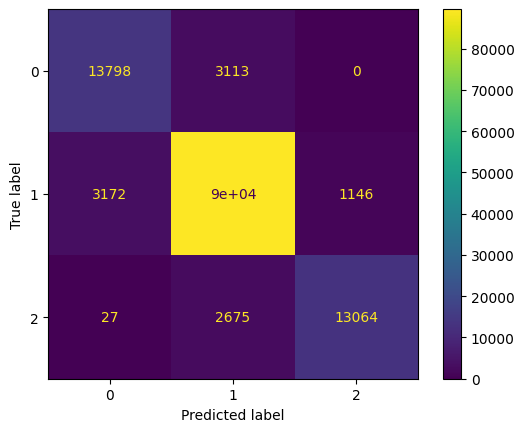

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

ConfusionMatrixDisplay( confusion_matrix(y_test, yhat) ).plot()

## **Multi-Label Problems**

Classes are NOT mutually exclusive.

e.g.,

y = [0,1,1]

Metrics are not going to work, e.g., accuracy, recall, confusion matrix

In [31]:
df = pd.read_csv('https://raw.githubusercontent.com/martinwg/ISA630/refs/heads/master/data/toxic_comments.csv')
df.head()

,Unnamed: 0,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,116043,6c7c290876c66572,My page should be protected first so that wort...,1,0,0,0,1,0
1,143704,015b3d713ac21e5d,Oh so it's you who wants the considerable amou...,1,0,1,0,1,0
2,133763,cb953131915ba38c,I'll leave you alone when you levae me and my ...,1,0,1,0,0,0
3,118814,7af7131ffb43e2d3,It's you who is doing original research by suc...,1,0,1,0,1,0
4,147953,445268c1b685da2a,other people's\nGosh you can't even speak Engl...,1,0,0,0,0,0


In [32]:
## vectorize comment_text
from sklearn.feature_extraction.text import TfidfVectorizer

## instance
vectorizer = TfidfVectorizer(max_features=200, strip_accents = "unicode")

## .fit_transform
X = vectorizer.fit_transform(df['comment_text'])
X = X.todense()

In [43]:
X = pd.DataFrame(X, columns = vectorizer.get_feature_names_out())
X.head()

,about,actually,all,alone,also,am,americans,an,and,are,...,who,why,wiki,wikipedia,will,with,would,yes,you,your
0,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.138133,0.000000
1,0.0,0.0,0.12934,0.000000,0.0,0.169189,0.0,0.00000,0.079671,0.0,...,0.132341,0.000000,0.0,0.0,0.139045,0.0,0.0,0.0,0.314867,0.000000
2,0.0,0.0,0.00000,0.688873,0.0,0.000000,0.0,0.00000,0.146887,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.348304,0.000000
3,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.34077,0.104954,0.0,...,0.174338,0.183169,0.0,0.0,0.000000,0.0,0.0,0.0,0.082957,0.000000
4,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.268376,0.208335


In [33]:
## y matrix
## multi-label one-hot encoded


(107, 200)

In [34]:
y = df.drop(['Unnamed: 0', 'id', 'comment_text'], axis=1)

In [38]:
y

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,1,0,0,0,1,0
1,1,0,1,0,1,0
2,1,0,1,0,0,0
3,1,0,1,0,1,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
102,1,1,1,0,1,1
103,1,0,0,0,0,0
104,1,0,1,0,1,0
105,1,0,0,0,0,0


## **Strategies for Multi-Label**

* Binary Relevance - Making a model for each class (model1 - y = toxic, model 2 - severe toxic, etc)
  

In [44]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier

rf = MultiOutputClassifier(RandomForestClassifier())
rf.fit(X, y)

MultiOutputClassifier(estimator=RandomForestClassifier())

In [45]:
yhat = rf.predict(X)

In [47]:
## Evaluation - Exact Match Ratio
from sklearn.metrics import accuracy_score

## this metric is supposed to be a low number
accuracy_score(y, yhat)

1.0

In [48]:
## to implement classifier chains
## chaining together the different labels
from sklearn.multioutput import ClassifierChain
from sklearn.ensemble import RandomForestClassifier

## wrap around the model
rf = ClassifierChain(RandomForestClassifier())

## fit
rf.fit(X, y)

ClassifierChain(base_estimator=RandomForestClassifier())